In [1]:
"""Y'all, this is a simple model for binary classification on the inbuild-dataset 'imdb' from keras"""
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

#Loading data from imdb datset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


Using TensorFlow backend.


In [2]:
#Convert the dataset into input tensor with 1 and 0
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

#Creating Validation set from the training set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [3]:
#Building the model - a simple model with 3 layers
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [4]:
#Compiling the model
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [5]:
#Training the model for 20 epochs
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs= 20,
                    batch_size= 512,
                    validation_data=(x_val, y_val)
                    )

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 161us/step - loss: 0.4930 - accuracy: 0.7887 - val_loss: 0.3632 - val_accuracy: 0.8725
Epoch 2/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.2878 - accuracy: 0.9063 - val_loss: 0.2965 - val_accuracy: 0.8867
Epoch 3/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.2117 - accuracy: 0.9282 - val_loss: 0.3066 - val_accuracy: 0.8747
Epoch 4/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.1653 - accuracy: 0.9472 - val_loss: 0.2819 - val_accuracy: 0.8861
Epoch 5/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.1334 - accuracy: 0.9577 - val_loss: 0.2873 - val_accuracy: 0.8850
Epoch 6/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.1081 - accuracy: 0.9659 - val_loss: 0.3306 - val_accuracy: 0.8733
Epoch 7/20
15000/15000 [==============================] - 2s 1

In [6]:
#Returns a object History with a member history  
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


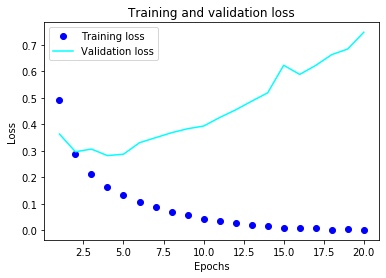

In [7]:
#Plotting for a better inference on the results
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'cyan', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

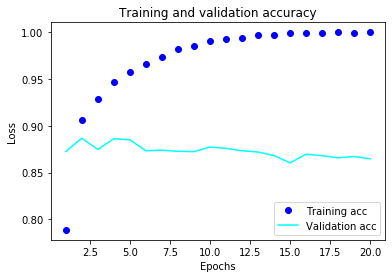

In [8]:
plt.clf()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'cyan', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
#Evaluating the model on the test dataset
results = model.evaluate(x_test, y_test)
print('Accuracy  ---->   '+ str(results[1]))

25000/25000 [==============================] - 3s 104us/step
Accuracy  ---->   0.8500400185585022


In [10]:
y_pred = model.predict(x_test)
print(y_pred)

[[0.01487146]
 [1.        ]
 [0.99836296]
 ...
 [0.00722454]
 [0.04944883]
 [0.830678  ]]
